Select an artist from the following list by entering the corresponding number:
0: J Balvin (100 songs)
1: Bad Bunny (50 songs)
2: Pop Smoke (50 songs)
3: B.U.G. Mafia (50 songs)
4: Eminem (50 songs)
5: Kanye West (50 songs)
6: Flo Rida (50 songs)
7: Lil Tjay (50 songs)
8: The Notorious B.I.G. (50 songs)
9: J. Cole (50 songs)
10: Subcarpaţi (50 songs)
11: 2Pac (50 songs)
12: Deliric (50 songs)
13: YoungBoy Never Broke Again (50 songs)
14: Wiz Khalifa (50 songs)
15: System of a Down (50 songs)
16: Judas Priest (50 songs)
17: Deftones (50 songs)
18: Apocalyptica (50 songs)
19: Periphery (50 songs)
20: Van Halen (50 songs)
21: Amorphis (50 songs)
22: Guess Who (50 songs)
23: Manowar (50 songs)
24: Dark Tranquillity (50 songs)
25: Maluma (50 songs)
26: Jul (50 songs)
27: Drake (50 songs)
28: Marko Glass (50 songs)
29: Lil Uzi Vert (50 songs)
30: Azteca (50 songs)
31: G-Eazy (50 songs)
32: Nicki Minaj (50 songs)
33: Bvcovia (50 songs)
34: Ian (50 songs)
35: Gunna (50 songs)
36: Juice Wrld (5

6129it [00:04, 1317.99it/s]
6129it [00:03, 1676.31it/s]
6129it [00:03, 1980.11it/s]
6129it [00:03, 1957.78it/s]
6129it [00:03, 1680.18it/s]
6129it [00:03, 1918.28it/s]
6129it [00:03, 1985.68it/s]
6129it [00:03, 1970.07it/s]
6129it [00:03, 1625.77it/s]
6129it [00:03, 2014.30it/s]
6129it [00:03, 1981.28it/s]
6129it [00:03, 1999.08it/s]
6129it [00:03, 1625.93it/s]
6129it [00:03, 1988.13it/s]
6129it [00:03, 2005.16it/s]
6129it [00:03, 1961.67it/s]
6129it [00:03, 1621.57it/s]
6129it [00:03, 1991.77it/s]
6129it [00:03, 2002.67it/s]
6129it [00:03, 1815.03it/s]
6129it [00:03, 1731.72it/s]
6129it [00:03, 1991.95it/s]
6129it [00:03, 1964.38it/s]
6129it [00:03, 1732.70it/s]
6129it [00:03, 1849.56it/s]
6129it [00:03, 1996.51it/s]
6129it [00:03, 2003.76it/s]
6129it [00:03, 1601.39it/s]
6129it [00:03, 2002.28it/s]
6129it [00:03, 2017.82it/s]
6129it [00:03, 2022.79it/s]
6129it [00:03, 1658.81it/s]
6129it [00:03, 2024.43it/s]
6129it [00:03, 2015.21it/s]
6129it [00:03, 2016.21it/s]
6129it [00:03, 1641.

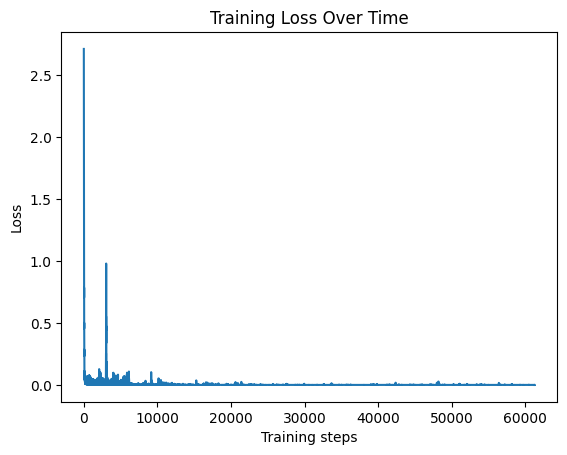

Recommended songs based on your preferences:
910693
12901222
87960517
1510293612
12901264
1761388347
65163036
87960491
1510293622
1510293762
2426335
1510293652
12901240
1510292622
1508425092
1510293822
646309972
1126546
1510293742
564972842
1126549
12901258
1510293842
62953958
1510293632
1510293642
1510293792
98000266
1510293672
1126556
12901243
1573596


In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from collections import deque
import random
from tqdm import tqdm
from matplotlib import pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DuelingDQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DuelingDQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.value_stream = nn.Linear(128, 1)
        self.advantage_stream = nn.Linear(128, action_size)

    def to(self, device):
        super().to(device)
        self.device = device
        return self

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        value = self.value_stream(x)
        advantage = self.advantage_stream(x)
        q_values = value + (advantage - advantage.mean(dim=-1, keepdim=True))
        return q_values

class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def add(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        return len(self.buffer)

file_path = '/content/artists_output_with_top_tracks.csv'
data = pd.read_csv(file_path)

categorical_features = ['GenreID', 'ArtistID', 'TrackID', 'ExplicitLyrics', 'ExplicitContentLyrics', 'ExplicitContentCover', 'track_genre']
numerical_features = ['Duration', 'Rank', 'BPM', 'Gain', 'danceability']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
data_transformed = preprocessing_pipeline.fit_transform(data)
data_transformed = torch.FloatTensor(data_transformed.toarray())

# Display the list of artists with the number of songs each artist has
artist_counts = data['ArtistName'].value_counts()
artist_list = list(artist_counts.index)
print("Select an artist from the following list by entering the corresponding number:")
for idx, (artist, count) in enumerate(artist_counts.items()):
    print(f"{idx}: {artist} ({count} songs)")

# Prompt the user to input the number corresponding to their preferred artist
artist_number = int(input("Enter the number of the artist you want to use for rewards: "))
selected_artist = artist_list[artist_number]
print(f"Selected artist: {selected_artist}")

# Prompt the user to enter their preferred genre
genre_list = data['track_genre'].unique()
print("Select a genre from the following list by entering the corresponding number:")
for idx, genre in enumerate(genre_list):
    print(f"{idx}: {genre}")

genre_number = int(input("Enter the number of the genre you want to use for rewards: "))
selected_genre = genre_list[genre_number]
print(f"Selected genre: {selected_genre}")

# Prompt the user to enter their preferred danceability range
min_danceability = float(input("Enter the minimum danceability (0 to 1): "))
max_danceability = float(input("Enter the maximum danceability (0 to 1): "))
print(f"Selected danceability range: {min_danceability} to {max_danceability}")

def get_action(state, model, epsilon=0.1):
    if random.random() < epsilon:  # Explore: select a random action
        return random.choice([0, 1])
    else:  # Exploit: select the action with the highest predicted reward
        with torch.no_grad():
            return model(state).argmax().item()

def get_reward(action, row, selected_artist, selected_genre, min_danceability, max_danceability):
    artist_reward = 1 if row['ArtistName'] == selected_artist else -1
    genre_reward = 1 if row['track_genre'] == selected_genre else -1
    danceability_reward = 1 if min_danceability <= row['danceability'] <= max_danceability else -1

    total_reward = artist_reward + genre_reward + danceability_reward
    return total_reward if action == 1 else -total_reward

def train_dueling_dqn(model, target_model, buffer, data, original_data, selected_artist, selected_genre, min_danceability, max_danceability, episodes=30, batch_size=64, gamma=0.99, update_target_every=5):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.MSELoss()
    losses = []

    for i in range(batch_size):
        for j, state_tensor in tqdm(enumerate(data)):
            row = original_data.iloc[j]
            state_tensor = state_tensor.to(device)
            action = get_action(state_tensor, model)
            reward = get_reward(action, row, selected_artist, selected_genre, min_danceability, max_danceability)
            next_state_tensor = state_tensor
            done = True
            buffer.add(state_tensor, action, reward, next_state_tensor, done)

    for episode in tqdm(range(episodes), desc="Training episodes"):
        rewards = []
        for j, state_tensor in enumerate(data):
            row = original_data.iloc[j]
            state_tensor = state_tensor.to(device)
            action = get_action(state_tensor, model)
            reward = get_reward(action, row, selected_artist, selected_genre, min_danceability, max_danceability)
            next_state_tensor = state_tensor
            done = True
            buffer.add(state_tensor, action, reward, next_state_tensor, done)

            if len(buffer) >= batch_size:
                batch = buffer.sample(batch_size)
                batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = zip(*batch)

                states = torch.stack([s.clone().detach() for s in batch_states]).float().to(device)
                actions = torch.tensor(batch_actions).long().to(device)
                rewards = torch.tensor(batch_rewards).float().to(device)
                next_states = torch.stack([s.clone().detach() for s in batch_next_states]).float().to(device)
                dones = torch.tensor(batch_dones).float().to(device)

                max_next_q_values = target_model(next_states).max(1)[0]
                target_q_values = rewards + gamma * max_next_q_values * (1 - dones)
                current_q_values = model(states).gather(1, actions.unsqueeze(1)).squeeze(1)
                loss = loss_fn(current_q_values, target_q_values)
                losses.append(loss.item())

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            if episode % update_target_every == 0:
                target_model.load_state_dict(model.state_dict())
    return losses

state_size = data_transformed.shape[1]
action_size = 2

model = DuelingDQN(state_size, action_size).to(device)
target_model = DuelingDQN(state_size, action_size).to(device)
target_model.load_state_dict(model.state_dict())
replay_buffer = ReplayBuffer(100)

losses = train_dueling_dqn(model, target_model, replay_buffer, data_transformed, data, selected_artist, selected_genre, min_danceability, max_danceability, episodes=10)
plt.plot(losses)
plt.xlabel('Training steps')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

# Recommend songs based on the trained model and user preferences
recommended_songs = []
model.eval()
with torch.no_grad():
    for i, state_tensor in enumerate(data_transformed):
        state_tensor = state_tensor.to(device)
        action = model(state_tensor).argmax().item()
        if action == 1:  # Recommend the song if the action is 1
            row = data.iloc[i]
            if (row['ArtistName'] == selected_artist and
                row['track_genre'] == selected_genre and
                min_danceability <= row['danceability'] <= max_danceability):
                recommended_songs.append(row['TrackID'])

print("Recommended songs based on your preferences:")
for track_id in recommended_songs:
    print(track_id)


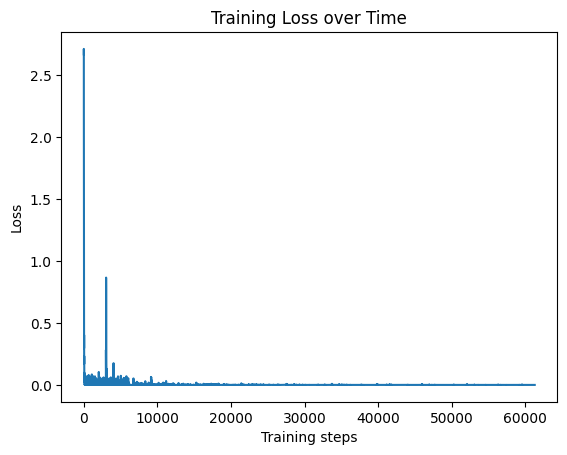

In [2]:
plt.plot(losses)
plt.xlabel('Training steps')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.show()

In [3]:
from IPython.display import display, Image, Audio, clear_output
import ipywidgets as widgets

def music_feedback_interface(image_url, sound_source, artist, song, duration, explicit_lyrics, callback):
    like_button = widgets.Button(description='Like', button_style='success')
    dislike_button = widgets.Button(description='Dislike', button_style='danger')

    display(widgets.HTML(f"<h2>{artist} - {song}</h2>"))
    display(widgets.HTML(f"<p>Duration: {duration} seconds</p>"))
    display(widgets.HTML(f"<p>Explicit Lyrics: {'Yes' if explicit_lyrics else 'No'}</p>"))
    display(Image(url=image_url, format='png', width=300, height=300))
    display(widgets.HBox([like_button, dislike_button]))

    def on_button_click(b):
        like_button.close()
        dislike_button.close()
        feedback = 1 if b.description == 'Like' else 0
        clear_output()
        callback(feedback, artist)

    like_button.on_click(on_button_click)
    dislike_button.on_click(on_button_click)

    display(Audio(url=sound_source, autoplay=True))

def recommend_song(model, data_transformed, original_data, exclude_indices, artist=None):
    max_q_value = -float('inf')
    max_q_value_index = None

    for i, state_tensor in enumerate(data_transformed):
        if i in exclude_indices:
            continue
        if artist is not None and original_data.iloc[i]["ArtistName"] != artist:
            continue
        q_values = model(state_tensor.to(device)).detach().cpu().numpy()
        if q_values[1] > max_q_value:
            max_q_value = q_values[1]
            max_q_value_index = i
    return max_q_value_index, original_data.iloc[max_q_value_index]

def suggest_song(model, data_transformed, original_data):
    exclude_indices = set()

    def show_next_song(feedback, artist):
        nonlocal exclude_indices
        if feedback == 0:
            exclude_indices.add(current_index)
            next_index, recommended_song = recommend_song(model, data_transformed, original_data, exclude_indices, artist)
            if next_index is None:
                print("No more songs to recommend.")
            else:
                display_next_song(next_index, recommended_song)
        else:
            print("You liked the song!")

    def display_next_song(index, song):
        nonlocal current_index
        current_index = index
        image_url = song["ImageLink"]
        sound_source = song["Preview"]
        artist = song["ArtistName"]
        song_title = song["Title"]
        duration = song["Duration"]
        explicit_lyrics = song["ExplicitLyrics"]
        music_feedback_interface(image_url, sound_source, artist, song_title, duration, explicit_lyrics, show_next_song)

    current_index, recommended_song = recommend_song(model, data_transformed, original_data, exclude_indices)
    display_next_song(current_index, recommended_song)

# Assuming 'model', 'data_transformed', and 'data' are already defined
suggest_song(model, data_transformed, data)

HTML(value="<h2>2Pac - Runnin' (Dying To Live)</h2>")

HTML(value='<p>Duration: 231 seconds</p>')

HTML(value='<p>Explicit Lyrics: Yes</p>')

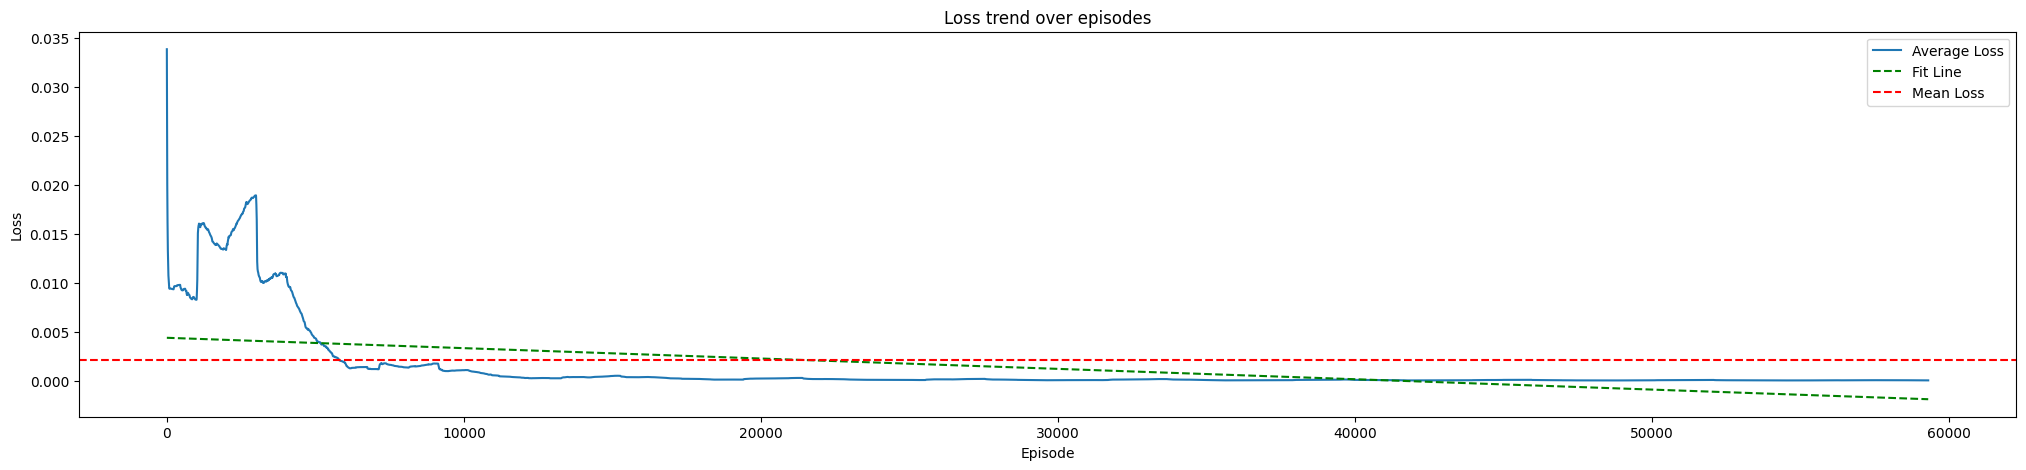

In [7]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

window_size = 2000
avg_losses = moving_average(losses, window_size)

coeffs = np.polyfit(range(len(avg_losses)), avg_losses, 1)

fit_line = coeffs[0] * np.array(range(len(avg_losses))) + coeffs[1]

mean_loss = np.mean(losses)

plt.figure(figsize=(25,5))
plt.plot(avg_losses, label='Average Loss')
plt.plot(fit_line, color='g', linestyle='--', label='Fit Line')
plt.axhline(mean_loss, color='r', linestyle='--', label='Mean Loss')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.title('Loss trend over episodes')
plt.legend()
plt.show()